In [2]:
import json
from matplotlib import pyplot as plt
import numpy as np
import os

Empty entry Experiment_Test_WINE/107/
Empty entry Experiment_Test_WINE/101/
Empty entry Experiment_Test_WINE/111/
Empty entry Experiment_Test_WINE/113/
Empty entry Experiment_Test_WINE/102/
Empty entry Experiment_Test_WINE/108/
Empty entry Experiment_Test_WINE/120/
Empty entry Experiment_Test_WINE/115/
Empty entry Experiment_Test_WINE/104/
Empty entry Experiment_Test_WINE/118/
Empty entry Experiment_Test_WINE/114/
Empty entry Experiment_Test_WINE/112/
Empty entry Experiment_Test_WINE/116/
Empty entry Experiment_Test_WINE/106/
Empty entry Experiment_Test_WINE/109/
Empty entry Experiment_Test_WINE/117/
Empty entry Experiment_Test_WINE/105/
Empty entry Experiment_Test_WINE/110/
Empty entry Experiment_Test_WINE/103/
Empty entry Experiment_Test_WINE/119/
(100,) (100,)


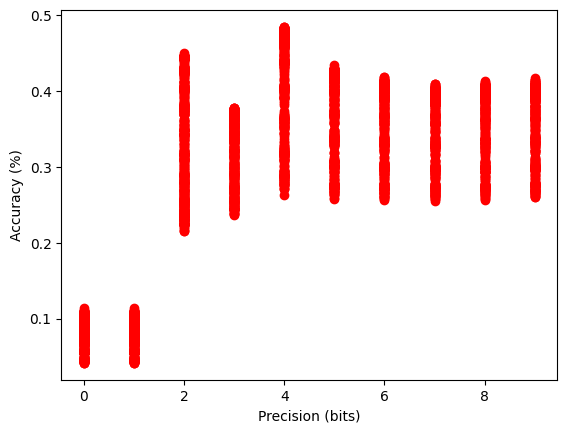

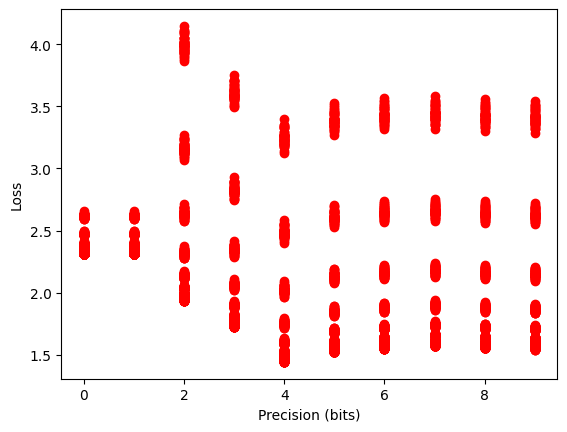

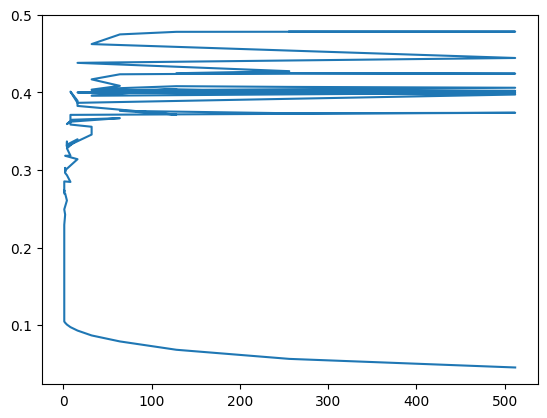

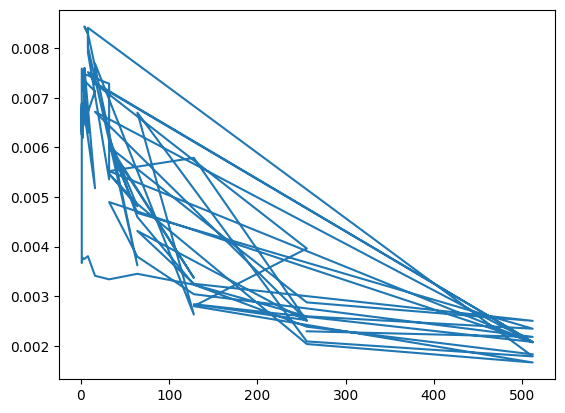

In [37]:
%matplotlib inline
def getConfig(filedir, exp):
    dir_name = 'Experiment_Data_%s/%d/'%(filedir, exp)
    filename = dir_name + 'config.json'
    with open(filename) as json_file:
        return json.load(json_file)

def loadData(filedir='WINE'):
    def getAccuracy(filedir):
        filename = filedir + 'metrics.json'
        with open(filename) as json_file:
            data = json.load(json_file)
        acc = data['val_accuracy']['values']
        loss = data['val_loss']['values']
        return acc, loss
        
        
    def getConfig(filedir):
        filename = filedir + 'config.json'
        with open(filename) as json_file:
            return json.load(json_file)
        
    val_acc = []
    val_loss = []
    prec = []
    shots = []
    
    dir_name = 'Experiment_Test_%s'%filedir
    
    dirs = os.listdir(dir_name)
    dirs.remove('_sources')
    for directory in dirs:
        filedir = dir_name + '/' + directory + '/'
        try:
            acc, loss = getAccuracy(filedir)
        except:
            print('Empty entry', filedir)
        else:
            val_acc.append(acc[0:50])
            val_loss.append(loss[0:50])
            config = getConfig(filedir)
            prec.append(config['precision'])
            shots.append(config['shots'])
    val_acc, val_loss, prec, shots = zip(*sorted(zip(val_acc, val_loss, prec, shots)))
    return np.array(val_acc), np.array(val_loss), np.array(prec), np.array(shots)

acc, loss, prec, shots = loadData()
print(np.mean(acc, axis=1).shape, prec.shape)
bits = np.log2(prec)
plt.plot(bits, acc, 'ro')
plt.xlabel('Precision (bits)')
plt.ylabel('Accuracy (%)')
plt.show()

bits = np.log2(prec)
plt.plot(bits, loss, 'ro')
plt.xlabel('Precision (bits)')
plt.ylabel('Loss')
plt.show()
#shots, acc, loss, prec = zip(*sorted(zip(shots, acc, loss, prec)))
plt.plot(shots, np.mean(acc, axis=1))
plt.show()
plt.plot(shots, np.std(acc, axis=1))

<IPython.core.display.Javascript object>


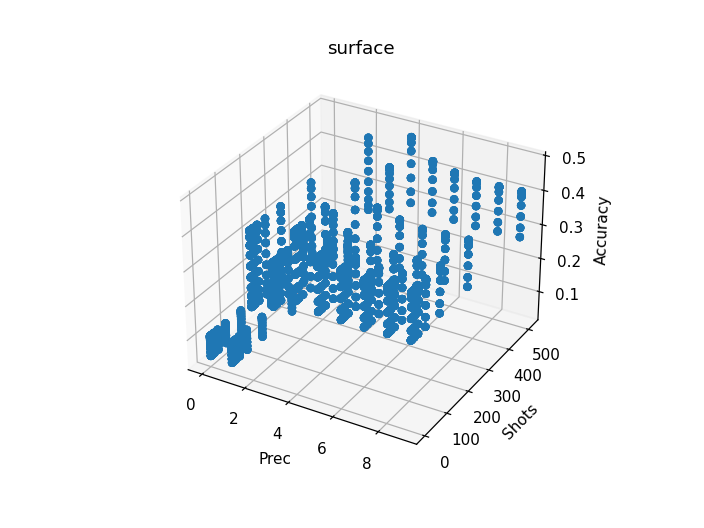

Text(0.5, 0, 'Accuracy')

In [36]:
%matplotlib notebook
X, Y = np.meshgrid(bits, shots)
Z, _ = np.meshgrid(np.mean(acc, axis=1), np.mean(acc, axis=1))
ax = plt.axes(projection='3d')
ax.scatter3D(X, Y, Z)
ax.set_title('surface')
ax.set_xlabel('Prec')
ax.set_ylabel('Shots')
ax.set_zlabel('Accuracy')

<IPython.core.display.Javascript object>


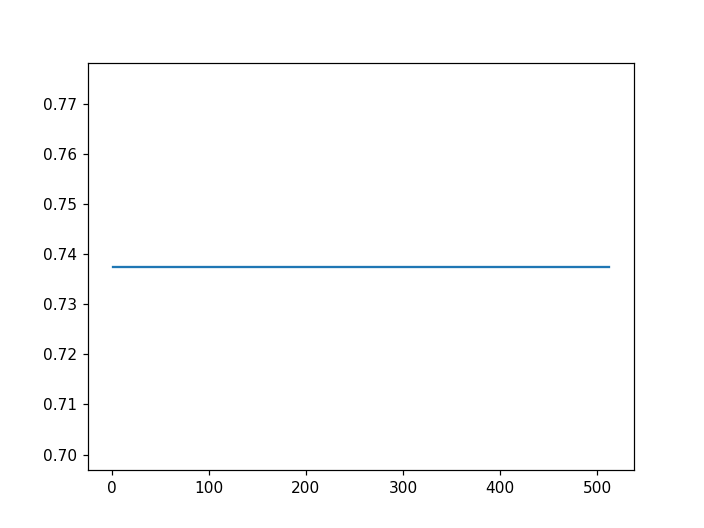

In [45]:
vals_512 = [shots[prec==16], acc[prec==16]]
plt.plot(vals_512[0], vals_512[1])

[1.00000000e-02 1.58489319e-03 3.98107171e-05 1.00000000e-10
 6.30957344e-10 3.98107171e-09 2.51188643e-08 1.58489319e-07
 1.00000000e-06 6.30957344e-06 2.51188643e-04 3.98107171e-05
 1.00000000e-10 6.30957344e-10 3.98107171e-09 2.51188643e-08
 1.58489319e-07 1.00000000e-06 6.30957344e-06 2.51188643e-04
 1.00000000e-02 1.58489319e-03 1.00000000e-02 1.58489319e-03
 3.98107171e-05 6.30957344e-06 1.00000000e-10 6.30957344e-10
 3.98107171e-09 2.51188643e-08 1.58489319e-07 1.00000000e-06
 2.51188643e-04 1.00000000e-02 1.58489319e-03 3.98107171e-05
 1.00000000e-10 6.30957344e-10 3.98107171e-09 2.51188643e-08
 1.58489319e-07 1.00000000e-06 6.30957344e-06 2.51188643e-04
 1.58489319e-03 3.98107171e-05 1.00000000e-10 6.30957344e-10
 3.98107171e-09 2.51188643e-08 1.58489319e-07 1.00000000e-06
 6.30957344e-06 2.51188643e-04 1.00000000e-02 1.58489319e-03
 3.98107171e-05 2.51188643e-04 1.00000000e-06 1.00000000e-10
 6.30957344e-10 3.98107171e-09 2.51188643e-08 1.58489319e-07
 6.30957344e-06 1.000000

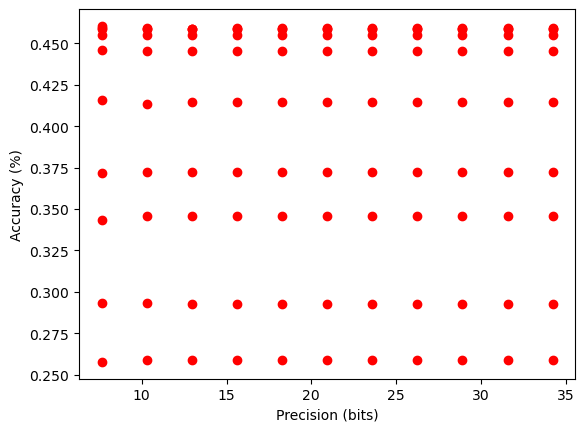

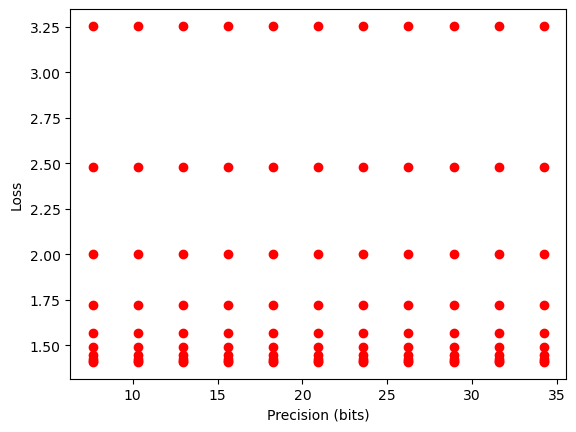

AxisError: axis 1 is out of bounds for array of dimension 1

In [22]:
%matplotlib inline
def getConfig(filedir, exp):
    dir_name = 'Experiment_Data_%s/%d/'%(filedir, exp)
    filename = dir_name + 'config.json'
    with open(filename) as json_file:
        return json.load(json_file)

def loadData(filedir='WINE_NOISY'):
    def getAccuracy(filedir):
        filename = filedir + 'metrics.json'
        with open(filename) as json_file:
            data = json.load(json_file)
        acc = data['val_accuracy']['values']
        loss = data['val_loss']['values']
        return acc, loss
        
        
    def getConfig(filedir):
        filename = filedir + 'config.json'
        with open(filename) as json_file:
            return json.load(json_file)
        
    val_acc = []
    val_loss = []
    prec = []
    shots = []
    
    dir_name = 'Experiment_Test_%s'%filedir
    
    dirs = os.listdir(dir_name)
    dirs.remove('_sources')
    for directory in dirs:
        filedir = dir_name + '/' + directory + '/'
        try:
            acc, loss = getAccuracy(filedir)
        except:
            print('Empty entry', filedir)
        else:
            val_acc.append(acc[0])
            val_loss.append(loss[0])
            config = getConfig(filedir)
            prec.append(config['sigma'])
            shots.append(config['shots'])
    val_acc, val_loss, prec, shots = zip(*sorted(zip(val_acc, val_loss, prec, shots)))
    return np.array(val_acc), np.array(val_loss), np.array(prec), np.array(shots)

acc, loss, prec, shots = loadData()
bits = np.log2(2/prec)
print(prec, bits)
plt.plot(bits, acc, 'ro')
plt.xlabel('Precision (bits)')
plt.ylabel('Accuracy (%)')
plt.show()

bits = np.log2(2/prec)
plt.plot(bits, loss, 'ro')
plt.xlabel('Precision (bits)')
plt.ylabel('Loss')
plt.show()
#shots, acc, loss, prec = zip(*sorted(zip(shots, acc, loss, prec)))
plt.plot(shots, np.mean(acc, axis=1))
plt.show()
plt.plot(shots, np.std(acc, axis=1))

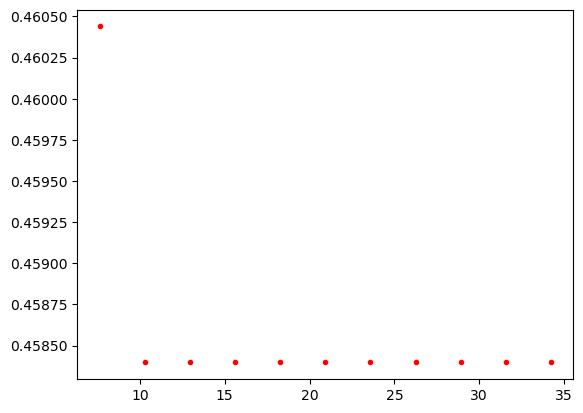

In [18]:
vals_512 = [np.log2(2/prec[shots==512]), acc[shots==512]]
plt.plot(vals_512[0], vals_512[1], 'r.')